# Tamizhiniyan S R

# TASK-2: Prediction using Unsupervised ML

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  accuracy_score
from sklearn.preprocessing import QuantileTransformer,StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier


import seaborn as sns

In [2]:
df = pd.read_csv("Iris.csv")


In [3]:
X=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df['Species']

In [4]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
X

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [5]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

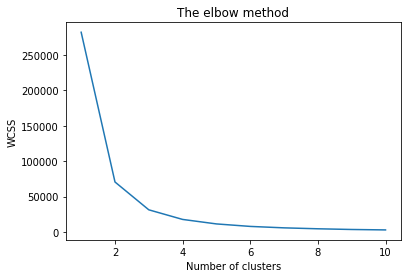

In [30]:

x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    features["labels"]=kmeans.fit_predict(x)
    features.drop(["labels"],axis=1,inplace=True)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

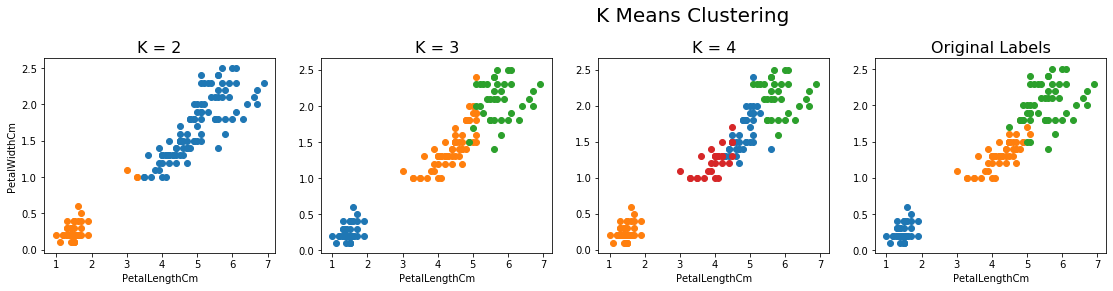

In [33]:
features = df.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]

plt.figure(figsize=(24,4))

plt.suptitle("K Means Clustering",fontsize=20)

plt.subplot(1,5,1)
plt.title("K = 2",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
kmeans = KMeans(n_clusters=2)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])

# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)
plt.subplot(1,5,2)
plt.title("K = 3",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=3)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])

# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,3)
plt.title("K = 4",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=4)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])
plt.scatter(features.PetalLengthCm[features.labels == 3],features.PetalWidthCm[features.labels == 3])

# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,4)
plt.title("Original Labels",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.scatter(df.PetalLengthCm[df.Species == "Iris-setosa"],df.PetalWidthCm[df.Species == "Iris-setosa"])
plt.scatter(df.PetalLengthCm[df.Species == "Iris-versicolor"],df.PetalWidthCm[df.Species == "Iris-versicolor"])
plt.scatter(df.PetalLengthCm[df.Species == "Iris-virginica"],df.PetalWidthCm[df.Species == "Iris-virginica"])



plt.subplots_adjust(top=0.8)
plt.show()

In [71]:

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(features)

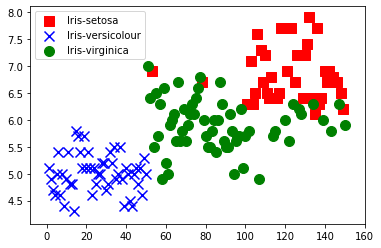

In [72]:
markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'green')
label=['Iris-setosa','Iris-versicolour','Iris-virginica']
for i in range(len(colors)):
    plt.scatter(x[y_kmeans == i, 0], x[y_kmeans == i, 1],s = 100,
               c=colors[i], marker=markers[i], label=label[i])



plt.legend()